Loaded public art dataset: rows = 199 cols = 18
Columns: ['_id', 'id', 'name', 'title', 'artist_name', 'art_type', 'park', 'image', 'neighborhood', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']


,_id,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,2,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,3,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,4,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,5,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


Using neighborhood column: neighborhood
Top neighborhoods by number of artworks:
                 neighborhood  num_artworks
9   Central Business District            27
47        Squirrel Hill South            20
0            Allegheny Center            18
25              Highland Park            10
42           South Side Flats             9
32                North Shore             8
3                   Beechview             7
40                  Shadyside             6
11            Central Oakland             5
28        Lower Lawrenceville             5
6            Brighton Heights             5
45      Spring Hill-City View             4
19                    Elliott             3
43          South Side Slopes             3
37               Point Breeze             3


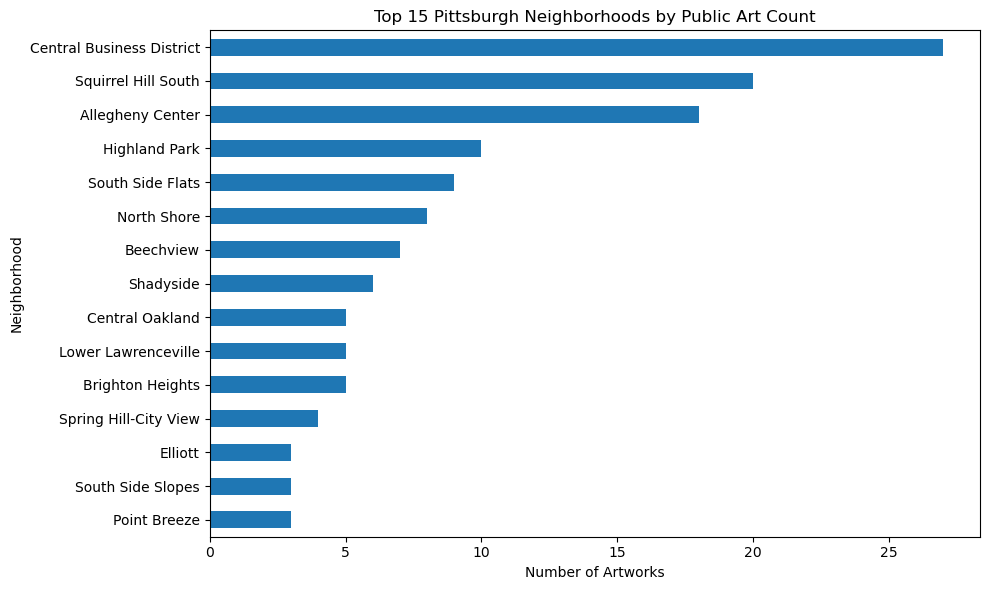

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

try:
    art = pd.read_csv("https://data.wprdc.org/dataset/city-of-pittsburgh-public-art/resource/00d74e83-8a23-486e-841b-286e1332a151/download/public_art.csv")
    print("Loaded public art dataset: rows =", art.shape[0], "cols =", art.shape[1])
except Exception as e:
    print("Error loading dataset.")
    raise e

print("Columns:", art.columns.tolist())
display(art.head())

neigh_cols = [c for c in art.columns if "neigh" in c.lower()]
if not neigh_cols:
    raise ValueError("No neighborhood-like column found. Check art.columns and set neighborhood_col manually.")
neighborhood_col = neigh_cols[0]
print("Using neighborhood column:", neighborhood_col)

# Group: count number of artworks per neighborhood
art_count_by_neigh = (
    art.groupby(neighborhood_col)
       .size()
       .reset_index(name="num_artworks")
)

# Sort descending
art_count_by_neigh = art_count_by_neigh.sort_values(by="num_artworks", ascending=False)
print("Top neighborhoods by number of artworks:")
print(art_count_by_neigh.head(15))

# Visualization: top 15 neighborhoods
top15 = art_count_by_neigh.head(15).set_index(neighborhood_col)

plt.figure(figsize=(10, 6))
top15["num_artworks"].plot(kind="barh")
plt.xlabel("Number of Artworks")
plt.ylabel("Neighborhood")
plt.title("Top 15 Pittsburgh Neighborhoods by Public Art Count")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()